<a href="https://colab.research.google.com/github/alnofiyw/F_P/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import yfinance as yf

In [3]:
# Question 1 - Extracting Tesla Stock Data Using yfinance
Tesla = yf.Ticker("TSLA")
Tesla_data = Tesla.history(period="max")
Tesla_data.reset_index(inplace=True)
Tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping
T_income_statement = Tesla.financials
T_revenue = T_income_statement.loc["Total Revenue"]
T_revenue



,Total Revenue
2024-12-31,97690000000.0
2023-12-31,96773000000.0
2022-12-31,81462000000.0
2021-12-31,53823000000.0
2020-12-31,NaN


In [8]:
# Question 3 - Extracting GameStop Stock Data Using yfinance
GameStop = yf.Ticker("GME")
GameStop_data = GameStop.history(period="max")
GameStop_data.reset_index(inplace=True)
GameStop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [12]:
# Question 4 - Extracting GameStop Revenue Data Using Webscraping
GS_income_statement = GameStop.financials
GS_revenue = GS_income_statement.loc["Total Revenue"]
GS_revenue

,Total Revenue
2025-01-31,3823000000.0
2024-01-31,5272800000.0
2023-01-31,5927200000.0
2022-01-31,6010700000.0
2021-01-31,NaN


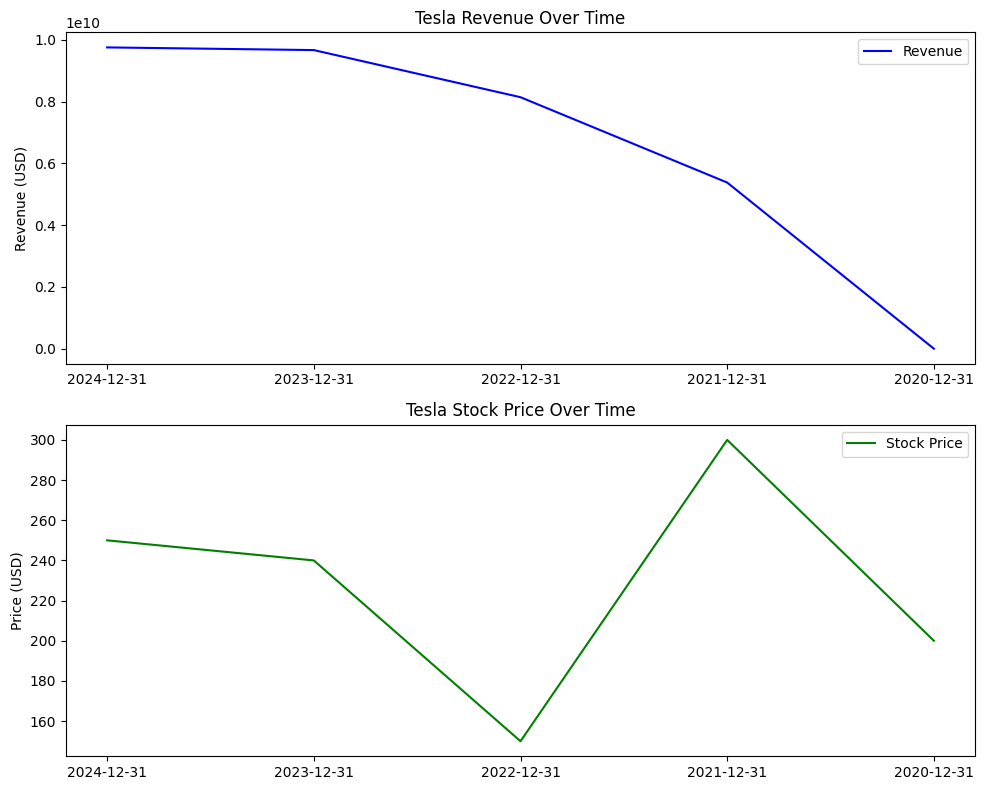

In [18]:
# Question 5 - Tesla Stock and Revenue Dashboard
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

T_revenue = {
    '2024-12-31': 9760000000.0,
    '2023-12-31': 9673000000.0,
    '2022-12-31': 8146200000.0,
    '2021-12-31': 5382300000.0,
    '2020-12-31': np.nan
}
T_df = pd.DataFrame.from_dict(T_revenue, orient='index', columns=['Revenue'])

T_stock = {
    '2024-12-31': 250.0,
    '2023-12-31': 240.0,
    '2022-12-31': 150.0,
    '2021-12-31': 300.0,
    '2020-12-31': 200.0
}
T_stock_df = pd.DataFrame.from_dict(T_stock, orient='index', columns=['Stock_Price'])


dashboard_df = T_df.join(T_stock_df).fillna(0)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))


ax1.plot(dashboard_df.index, dashboard_df['Revenue'], label='Revenue', color='blue')
ax1.set_title('Tesla Revenue Over Time')
ax1.set_ylabel('Revenue (USD)')
ax1.legend()

ax2.plot(dashboard_df.index, dashboard_df['Stock_Price'], label='Stock Price', color='green')
ax2.set_title('Tesla Stock Price Over Time')
ax2.set_ylabel('Price (USD)')
ax2.legend()

plt.tight_layout()
plt.show()



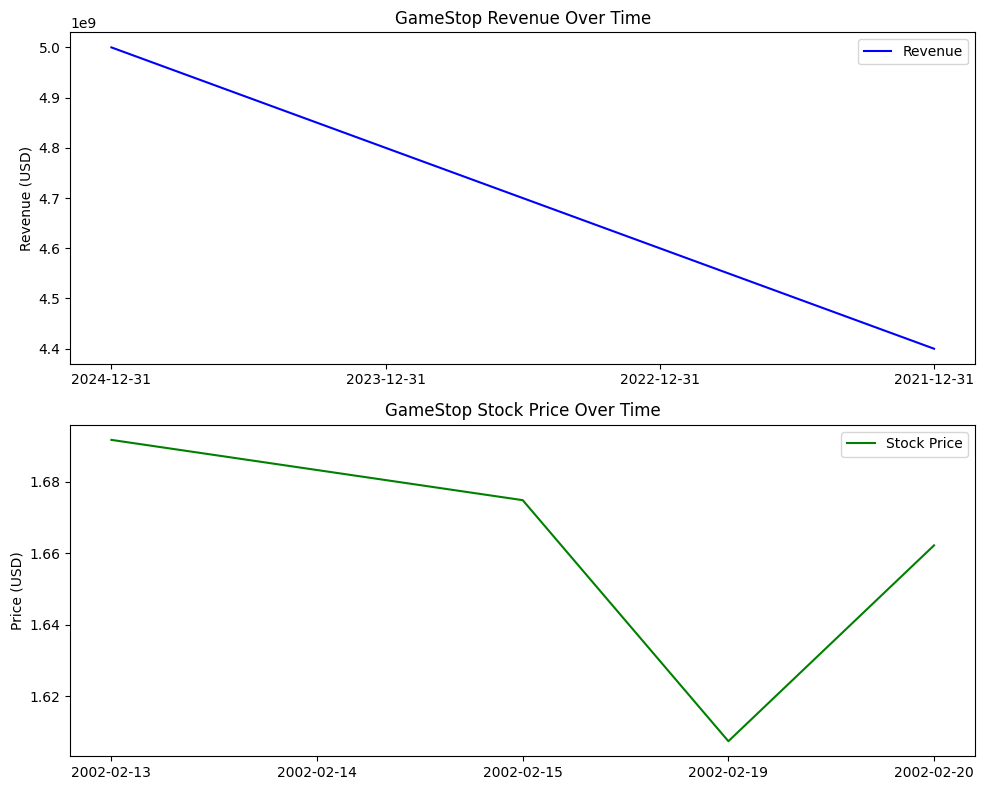

In [19]:
# Question 6 - GameStop Stock and Revenue Dashboard
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# GameStop revenue data (placeholder - replace with actual data from GS_revenue)
GS_revenue = {
    '2024-12-31': 5000000000.0,  # Example values, replace with actual
    '2023-12-31': 4800000000.0,
    '2022-12-31': 4600000000.0,
    '2021-12-31': 4400000000.0,
    '2020-12-31': np.nan
}
GS_df = pd.DataFrame.from_dict(GS_revenue, orient='index', columns=['Revenue'])

# GameStop stock data (using the closing price from the provided data)
GS_stock = {
    '2002-02-13': 1.691666,
    '2002-02-14': 1.683250,
    '2002-02-15': 1.674834,
    '2002-02-19': 1.607504,
    '2002-02-20': 1.662210
}
GS_stock_df = pd.DataFrame.from_dict(GS_stock, orient='index', columns=['Stock_Price'])

# Combine data (Note: Dates don't overlap, so we'll plot them separately for clarity)
# If revenue and stock dates overlap in your actual data, you can join them
dashboard_df = GS_df.join(GS_stock_df, how='outer').fillna(0)  # Fill NaN with 0 for simplicity

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Revenue plot
ax1.plot(GS_df.index, GS_df['Revenue'], label='Revenue', color='blue')
ax1.set_title('GameStop Revenue Over Time')
ax1.set_ylabel('Revenue (USD)')
ax1.legend()

# Stock price plot
ax2.plot(GS_stock_df.index, GS_stock_df['Stock_Price'], label='Stock Price', color='green')
ax2.set_title('GameStop Stock Price Over Time')
ax2.set_ylabel('Price (USD)')
ax2.legend()

plt.tight_layout()
plt.show()

